# PROYECTO WAZE CHURN

- #### Juan Pablo Colomé
- #### Carlos Moreno

## 2. Introducción
 + El proyecto es sobre aprender a llevar modelos a ambientes productivos a través de el ciclo de vida de MLOPs. En este caso serán modelos que tratan de predecir el churn de los usuarios en WAZE. Este análisis exploratorio de datos (EDA) está centrado en el proyecto de Waze para analizar el comportamiento de los usuarios con respecto a la retención y el abandono de la aplicación. A través de este proyecto, se busca identificar patrones clave que permitan mejorar la experiencia del usuario y predecir el comportamiento de abandono.

## 3. Antecedentes
- El análisis de datos en el contexto de aplicaciones móviles es crucial para comprender cómo los usuarios interactúan con la plataforma, qué motiva su comportamiento y cómo mejorar su retención. Waze, como aplicación de navegación, presenta un caso interesante, ya que sus usuarios pueden depender de ella para múltiples funciones, desde la navegación diaria hasta la planificación de rutas a largo plazo. El dataset que se usa fue sacado de el siguiente link, https://www.kaggle.com/datasets/monaelshamaa/waze-dataset-6/data. El dataset lleva 4 meses desde que se publico en el momento que se creo este proyecto, por lo que no tiene muchos antecedentes. De hecho, solo la autora del dataset ha subido notebooks donde trabaja con este dataset.

## 4. Objetivos

- ### Objetivos Generales
    + Realizar un análisis exhaustivo de los datos proporcionados por Waze para identificar patrones de comportamiento de los usuarios y ayudar a predecir el abandono de la aplicación.
    + Crear modelos y llevarlos por el ciclo de vida de MLOPs.
    + Usar los modelos en ambientes productivos.

- ### Objetivos Específicos
    + Realizar un análisis exploratorio de los datos (EDA).
    + Limpiar y preparar los datos para su análisis.
    + Crear modelos de predicción.
    + Selección de modelos.


## 5. Planteamiento del problema
+ El problema que se busca abordar en este proyecto es la retención de usuarios de la aplicación Waze. Identificar qué factores contribuyen al abandono y qué características están asociadas con la retención puede ayudar a diseñar estrategias más efectivas para mantener a los usuarios.

## 6. Exploración y limpieza de datos

+ A continuación, se explorará el dataset, identificando valores faltantes, outliers y otros aspectos relevantes.


In [1]:
## 1. Imports y carga de datos
# En esta sección se cargarán las librerías necesarias y se importará el dataset.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Cargar el dataset
csv_path = '../data/waze_dataset.csv'
df = pd.read_csv(csv_path)
# Resumen de los datos
df.info()
row,col = df.shape
col_with_missing_values = list()
for i in range(col):  
    if df.iloc[:,i].isnull().sum()>0:
        col_with_missing_values.append(i) 
        print(f'Column {i} is missing {df.iloc[:,i].isnull().sum()} values!') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
Column 1 is missing

Hay 700 nulos en la columna label. Pongamoslo en un dataframe diferente.

In [20]:
# Isolate rows with null values
df_null_label = df['label'].isnull()
df_null = df[df_null_label]

# Display summary stats of rows with null values
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [21]:
# Isolate rows without null values
df_not_null_label = df['label'].notnull()
df_not_null   = df[df_not_null_label]

# Display summary stats of rows without null values
df_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [18]:
# Estadísticas descriptivas
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,0.449255
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,0.687216
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.530637


Los tres dataframes se comportan de manera similar.

Se identificó que las columnas más relevantes para el análisis son: `label`, `sessions`, `drives`, `n_days_after_onboarding`, `driven_km_drives`, `duration_minutes_drives`, `activity_days`, `driving_days`, `device`. Las columnas no esenciales para este análisis incluyen: `ID`, `total_sessions`, `total_navigations_fav1`, `total_navigations_fav2`.m

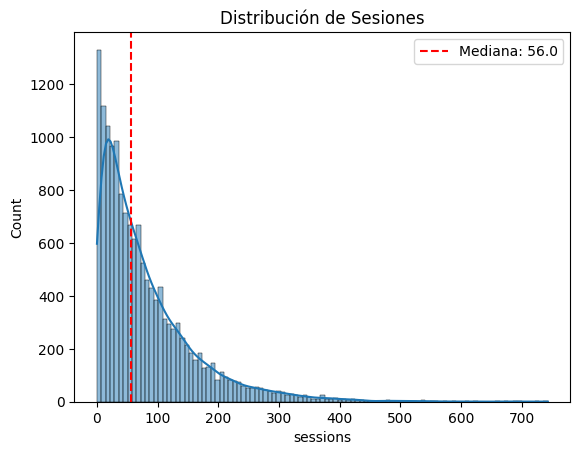

In [3]:
## 7. Visualización de datos
#Se generarán visualizaciones para entender mejor los patrones y relaciones entre las variables más importantes.


# Histograma de sesiones
sns.histplot(data=df, x="sessions", kde=True)
plt.title('Distribución de Sesiones')
plt.axvline(df["sessions"].median(), color="red", linestyle="--", label=f'Mediana: {df["sessions"].median()}')
plt.legend()
plt.show()

Tiene sentido que la tendencia sea a la baja, ya que cada vez menos las personas llegan a tantas sesiones.

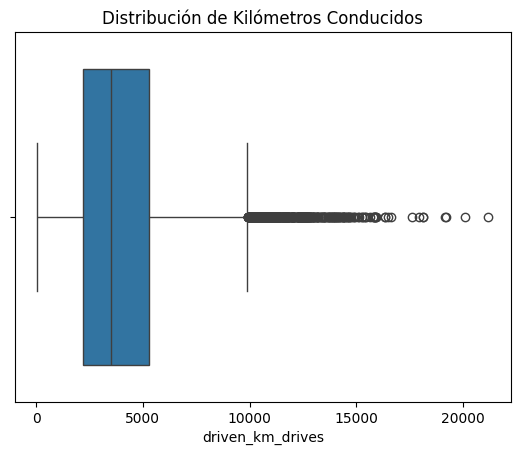

In [4]:
# Boxplot de kilómetros conducidos
sns.boxplot(data=df, x="driven_km_drives")
plt.title('Distribución de Kilómetros Conducidos')
plt.show()

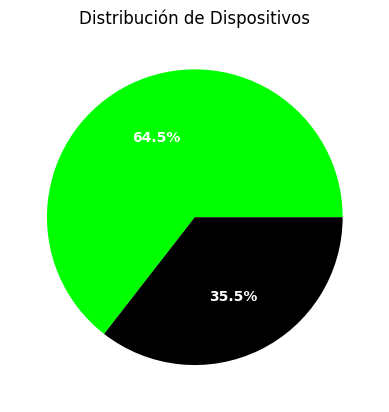

In [5]:
# Pie chart del dispositivo utilizado
device_counts = df['device'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=["lime", "black"], textprops={'color':"w", 'fontweight':"bold"})
plt.title('Distribución de Dispositivos')
plt.show()

64.5 de los usuarios usan apple y el resto usa android.

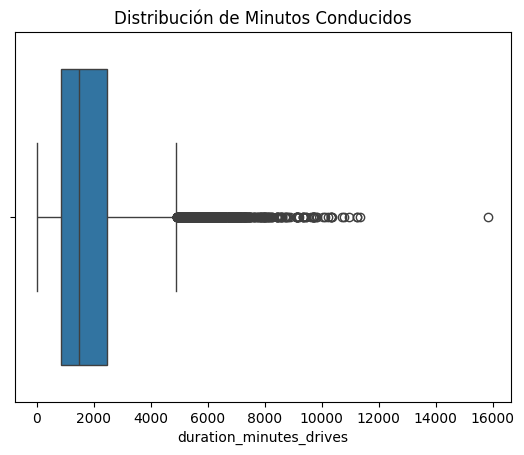

In [6]:
# Boxplot de duración en minutos de manejo
sns.boxplot(data=df, x="duration_minutes_drives")
plt.title('Distribución de Minutos Conducidos')
plt.show()

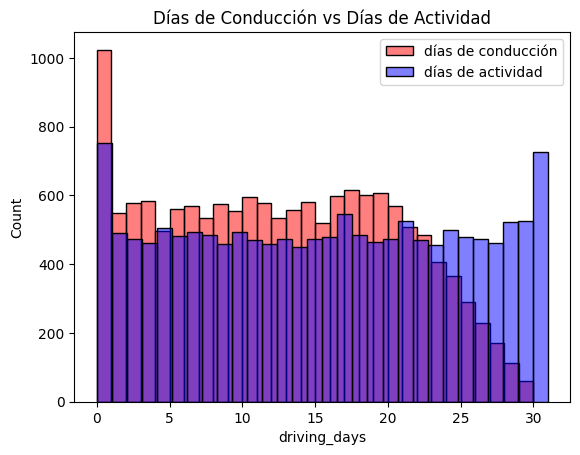

In [7]:
# Histograma de días de actividad vs días de conducción
sns.histplot(df["driving_days"], color='r', alpha=0.5, label="días de conducción", bins=30)
sns.histplot(df["activity_days"], color='b', alpha=0.5, label="días de actividad", bins=30)
plt.legend()
plt.title('Días de Conducción vs Días de Actividad')
plt.show()

Text(0.5, 1.0, 'Porcentaje de Sesiones en el Último Mes por Estado de Usuario')

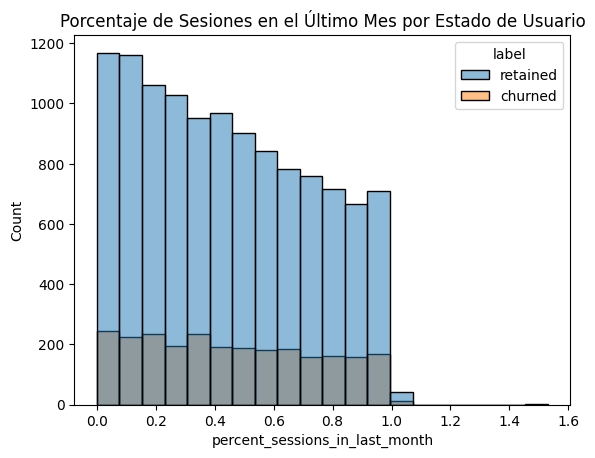

In [8]:
# Histograma del porcentaje de sesiones en el último mes
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
sns.histplot(data=df, x="percent_sessions_in_last_month", hue="label", bins=20)
plt.title("Porcentaje de Sesiones en el Último Mes por Estado de Usuario")

## 8. Conclusión
Este análisis exploratorio de datos nos ha permitido visualizar los patrones en el comportamiento de los usuarios de Waze. Se identificaron diferencias en la retención entre usuarios de diferentes dispositivos y en base a la cantidad de kilómetros conducidos. Los usuarios que utilizan la aplicación con mayor frecuencia y conducen mayores distancias tienden a abandonar con mayor frecuencia, lo que puede ser un área importante a investigar.

En conclusión, el EDA nos ha permitido generar varias hipótesis que pueden ser útiles para el equipo de Waze a la hora de desarrollar estrategias de retención.